# LAB 3: KNN MODEL USING BINARY CLASSIFIER

In [62]:
%pip install seaborn
%pip install matplotlib



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [63]:
import pandas as pd
import numpy as np
import matplotlib as plt
import statistics as st
import seaborn as sns


In [64]:
data = pd.read_csv('Datasets/Heart_Dataset_non_categorical.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [65]:
X = data.drop(columns='target')
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


<Axes: xlabel='thal', ylabel='target'>

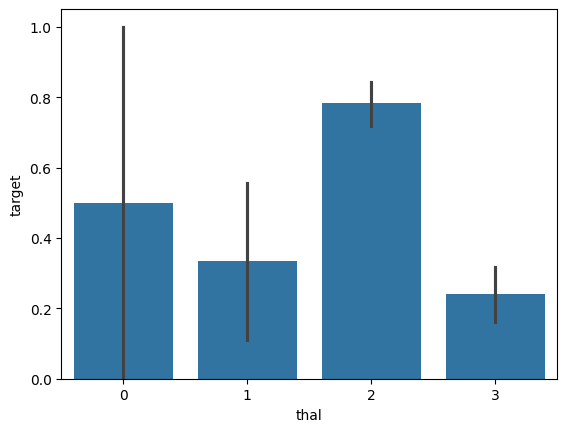

In [69]:
sns.barplot(x=data['thal'],y=Y) 

In [57]:
Y = data['target']
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [58]:
test = X.loc[298]
test

age          57.0
sex           0.0
cp            0.0
trestbps    140.0
chol        241.0
fbs           0.0
restecg       1.0
thalach     123.0
exang         1.0
oldpeak       0.2
slope         1.0
ca            0.0
thal          3.0
Name: 298, dtype: float64

In [73]:
def my_knn_classifier1(test, X, Y, k):
    sub_res = abs(test - X)
    summed_res = sub_res.sum(axis=1)
    sorted_res = summed_res.argsort()
    outputs = Y[sorted_res]
    k_top = outputs[:k]
    return k_top.mode()

In [74]:
def my_knn_classifier2(test, X, Y, k):
    sub_res = test - X
    squared_res = sub_res**2
    summed_res = squared_res.sum(axis=1)
    euclidean_res = summed_res ** 0.5
    sorted_res = euclidean_res.argsort()
    outputs = Y[sorted_res]
    k_top = outputs[:k]
    return k_top.mode()

In [75]:
my_knn_classifier1(X.loc[0], X, Y, 3)

0    1
Name: target, dtype: int64

In [77]:
# bernoulli features have binary distribution
from sklearn.model_selection import train_test_split 

X_train,X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.20,random_state=0) 
print(X_train.shape )
print(X_test.shape) 
print(Y_train.shape) 
print(Y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [78]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report

In [79]:
classifier1 = KNeighborsClassifier(n_neighbors=5)
model1=classifier1.fit(X_train, Y_train)
Y_pred1 = model1.predict(X_test) 
print("The accuracy is "+str(metrics.accuracy_score(Y_test,Y_pred1)*100)+"%") 
print(confusion_matrix(Y_test, Y_pred1))

The accuracy is 63.934426229508205%
[[17 10]
 [12 22]]


In [81]:
classifier1 = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
model1=classifier1.fit(X_train, Y_train)
Y_pred1 = model1.predict(X_test) 
print("The accuracy is "+str(metrics.accuracy_score(Y_test,Y_pred1)*100)+"%") 
print(confusion_matrix(Y_test, Y_pred1))

The accuracy is 68.85245901639344%
[[18  9]
 [10 24]]
